In [7]:
import pandas as pd

In [9]:
data = pd.read_csv("C:/Users/anami/ML_Algorithms_project_ICTA/humidity-prediction/dataset/weather-history.csv")

In [10]:
data


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [15]:
import matplotlib.pyplot as plt

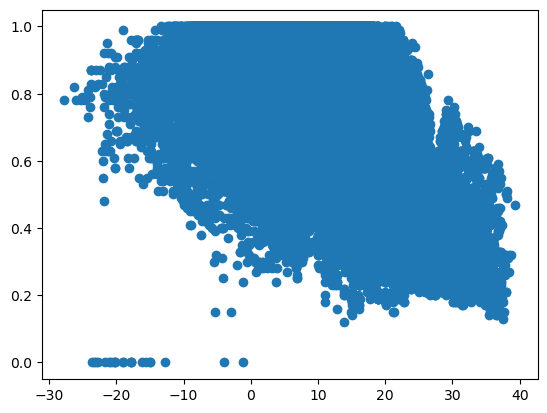

In [39]:
plt.scatter(data['Apparent Temperature (C)'],data['Humidity'])

Text(0.5, 0, 'Apparent Temperature (C)')

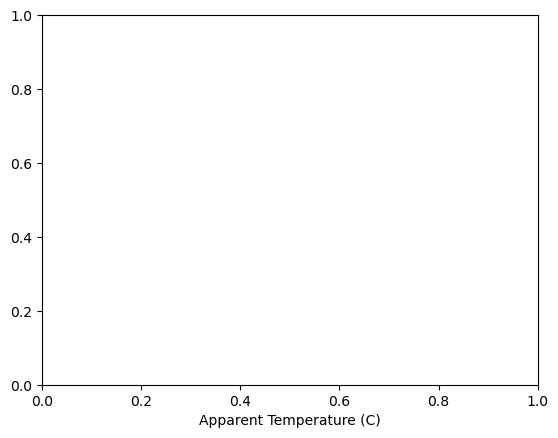

In [40]:
plt.xlabel("Apparent Temperature (C)")

Text(0, 0.5, 'Humidity')

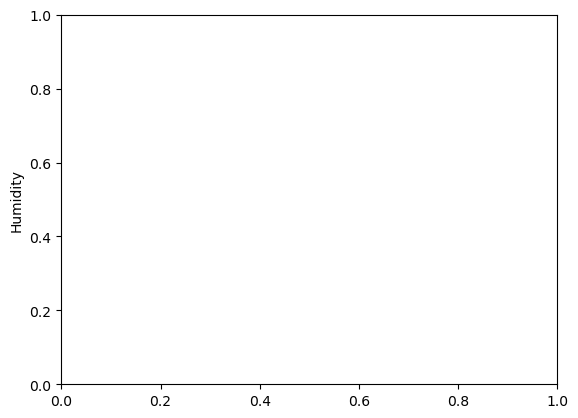

In [41]:
plt.ylabel('Humidity')

In [42]:
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data['Apparent Temperature (C)'], data['Humidity'], test_size=0.2)



In [48]:
from sklearn.preprocessing import StandardScaler


In [49]:
scaler = StandardScaler()


In [50]:
X_train = scaler.fit_transform(X_train.values.reshape(-1, 1))


In [51]:
X_test = scaler.transform(X_test.values.reshape(-1, 1))



In [52]:
from sklearn.linear_model import LinearRegression



In [53]:
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [55]:
from sklearn.metrics import mean_squared_error, r2_score


In [60]:
import numpy as np

In [62]:
y_pred = model.predict(X_test)
y_pred


array([0.75786147, 0.64675397, 0.92834872, ..., 0.64730492, 0.67766818,
       0.5794161 ])

In [63]:
mse = mean_squared_error(y_test, y_pred)
mse

0.024794695177605772

In [64]:
rmse = np.sqrt(mse)
rmse

0.15746331375150777

In [66]:
r2 = r2_score(y_test, y_pred)
r2

0.3551912207981057

In [67]:
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)



Mean Squared Error: 0.024794695177605772
Root Mean Squared Error: 0.15746331375150777
R-squared: 0.3551912207981057


In [68]:
new_data = pd.DataFrame({'apparent_temperature': [20, 25, 30]})


In [69]:
new_data_scaled = scaler.transform(new_data.values.reshape(-1, 1))


In [71]:
new_humidity = model.predict(new_data_scaled)
print('Predicted humidity:',new_humidity)

Predicted humidity: [0.63451072 0.5794161  0.52432147]


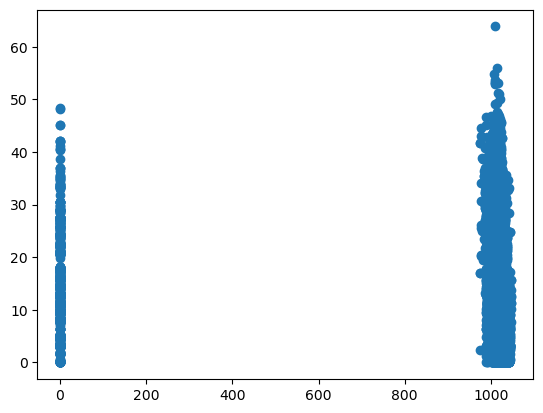

In [74]:
plt.scatter(data['Pressure (millibars)'],data['Wind Speed (km/h)'])

Text(0.5, 0, 'Pressure (millibars)')

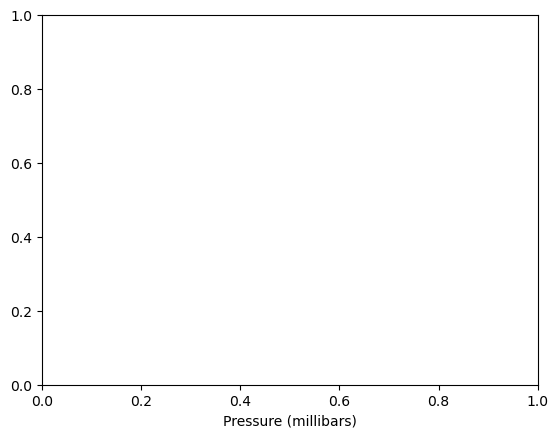

In [76]:
plt.xlabel('Pressure (millibars)')

Text(0, 0.5, 'Wind Speed (km/h)')

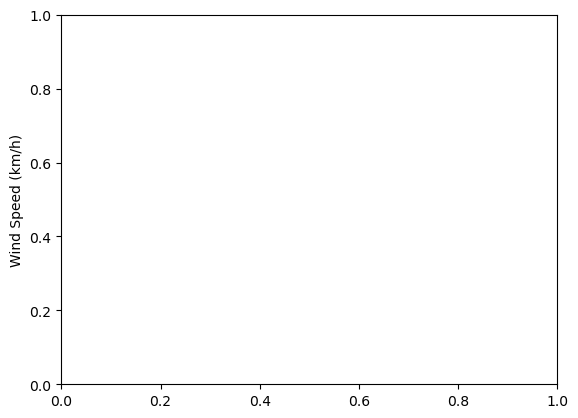

In [78]:
plt.ylabel('Wind Speed (km/h)')

In [85]:
import numpy as np

In [86]:
X_train, X_test, y_train, y_test = train_test_split(data['Pressure (millibars)'], data['Wind Speed (km/h)'], test_size=0.2)



In [87]:
scaler = StandardScaler()

In [88]:
X_train = scaler.fit_transform(X_train.values.reshape(-1, 1))


In [93]:
X_test = scaler.transform(X_test.values.reshape(-1, 1))



In [94]:
from sklearn.linear_model import LinearRegression


In [95]:
y_pred = model.predict(X_test)
y_pred


array([0.7224627 , 0.72307533, 0.72613851, ..., 0.72997502, 0.7282978 ,
       0.71985146])

In [96]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [97]:
mse = mean_squared_error(y_test, y_pred)
mse

148.57032187579648

In [98]:
rmse = np.sqrt(mse)
rmse

12.188942606961298

In [99]:
r2 = r2_score(y_test, y_pred)
r2

-2.1453252863748435

In [100]:
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)



Mean Squared Error: 148.57032187579648
Root Mean Squared Error: 12.188942606961298
R-squared: -2.1453252863748435
